# Removing outliers & nan-values

## Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('data_cleaned.csv', index_col = 'Unnamed: 0')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,item_price_usd,amount_over_fmt_usd,albumRelease_count,inAlbum_new,date_pub_utc,date_mod_utc,byArtist_genre
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,9.99,0.0,1,is,1.599054e+09,1.599054e+09,alternative
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,1.30,0.0,1,is,1.585408e+09,1.585408e+09,electronic
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,3.90,0.0,1,is,1.598000e+09,1.598000e+09,electronic
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,1.0,O Ruthless Great Divine Director,1.00,0.0,1,not,1.585200e+09,1.585200e+09,experimental
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,1.0,Try to Reach Me,1.29,0.0,1,in,1.589932e+09,1.589933e+09,alternative


In [5]:
#df = df.reset_index()
len(df)

664427

## Removing the not na values

In [6]:
df.isna().sum()

index                      0
item_type                  0
utc_date                   0
country_code               0
item_description           6
art_id                   134
artist_name                1
currency                   0
amount_paid_usd            0
_id_y                      0
numTracks                  0
name                       6
item_price_usd             0
amount_over_fmt_usd        0
albumRelease_count         0
inAlbum_new                0
date_pub_utc               0
date_mod_utc               0
byArtist_genre         51685
dtype: int64

In [7]:
df = df[df['item_description'].notna()]
df = df[df['art_id'].notna()]
df = df[df['name'].notna()]
df = df[df['byArtist_genre'].notna()] 
df = df[df['artist_name'].notna()] 

# Outlier detection

In [8]:
import seaborn as sns

<Axes: xlabel='amount_paid_usd', ylabel='byArtist_genre'>

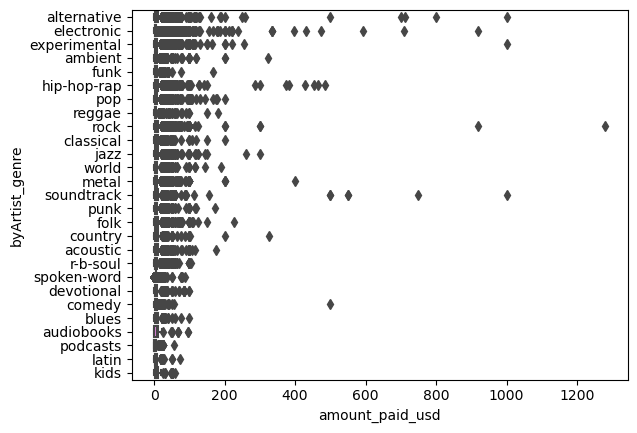

In [9]:
sns.boxplot(data=df, x="amount_paid_usd", y="byArtist_genre")

In [10]:
df['amount_paid_usd'].describe()

count    612610.000000
mean          5.291150
std           7.408111
min           0.220000
25%           1.290000
50%           3.820000
75%           8.000000
max        1279.500000
Name: amount_paid_usd, dtype: float64

In [11]:
amount_paid_mean, amount_paid_std = df['amount_paid_usd'].mean(), df['amount_paid_usd'].std()

cut_off = amount_paid_std * 3
lower, upper = amount_paid_mean - cut_off, amount_paid_mean + cut_off

In [12]:
df = df[(df["amount_paid_usd"] < upper) & (df["amount_paid_usd"] > lower)]

<Axes: xlabel='amount_paid_usd', ylabel='byArtist_genre'>

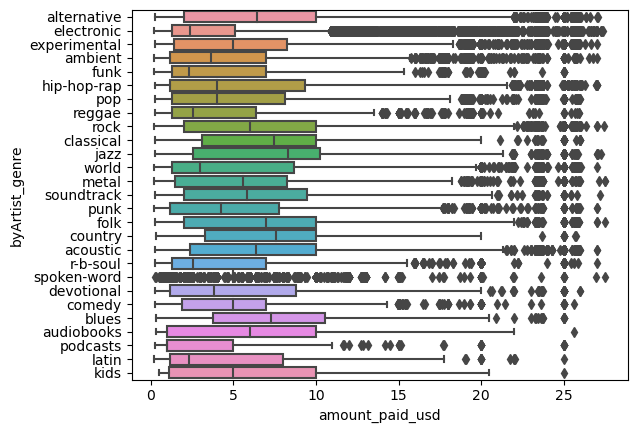

In [13]:
sns.boxplot(data=df, x="amount_paid_usd", y="byArtist_genre")

In [14]:
df['amount_paid_usd'].describe()

count    609723.000000
mean          5.043499
std           4.331765
min           0.220000
25%           1.290000
50%           3.800000
75%           8.000000
max          27.490000
Name: amount_paid_usd, dtype: float64

## Feature selection

Turning the categories into codes for feature selection. Cannot make use of one-hot encoding since too many categorical variables with too many different values. Values are set according to their alphabetic order. 

In [15]:
dfc = df.copy()

In [16]:
genre = pd.Categorical(dfc['byArtist_genre']).codes
item_type = pd.Categorical(dfc['item_type']).codes
country_code = pd.Categorical(dfc['country_code']).codes
artist_name = pd.Categorical(dfc['artist_name']).codes
item_descrip = pd.Categorical(dfc['item_description']).codes
cur = pd.Categorical(dfc['currency']).codes
idy = pd.Categorical(dfc['_id_y']).codes
name = pd.Categorical(dfc['name']).codes
inAlb_new = pd.Categorical(dfc['inAlbum_new']).codes

In [17]:
dfc = dfc.reset_index()

In [18]:
dfc['item_type'] = item_type
dfc['country_code'] = country_code
dfc['artist_name'] = artist_name
dfc['item_description'] = item_descrip
dfc['currency'] = cur
dfc['_id_y'] = idy
dfc['name'] = name
dfc['inAlbum_new'] = inAlb_new 
dfc['byArtist_genre'] = genre

In [19]:
dfc.head()

,level_0,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,item_price_usd,amount_over_fmt_usd,albumRelease_count,inAlbum_new,date_pub_utc,date_mod_utc,byArtist_genre
0,0,0,0,1.599689e+09,55,117014,2.064053e+08,40579,17,9.99,96069,14.0,116903,9.99,0.0,1,1,1.599054e+09,1.599054e+09,1
1,1,1,0,1.599689e+09,50,137001,2.984242e+09,51265,6,1.30,148311,1.0,136871,1.30,0.0,1,1,1.585408e+09,1.585408e+09,9
2,2,2,0,1.599689e+09,50,201375,3.320495e+09,22687,6,3.90,148316,2.0,201247,3.90,0.0,1,1,1.598000e+09,1.598000e+09,9
3,3,3,1,1.599689e+09,168,141835,3.428873e+09,57836,17,1.00,141950,1.0,141712,1.00,0.0,1,2,1.585200e+09,1.585200e+09,10
4,4,4,1,1.599689e+09,168,213914,7.723710e+08,94704,17,1.29,223003,1.0,213791,1.29,0.0,1,0,1.589932e+09,1.589933e+09,1


Using scikitlearn feature selection methods. 
I will use f_regression since the predicted variable (amount_paid_usd) is a numerical variable. 

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

In [21]:
y = dfc['amount_paid_usd']

In [22]:
X = dfc[['item_type', 'utc_date', 'country_code', 'item_description', 'art_id', 'artist_name', 'currency', '_id_y', 'numTracks', 'name', 'item_price_usd', 'albumRelease_count', 'inAlbum_new', 'date_pub_utc', 'date_mod_utc', 'byArtist_genre']]

In [23]:
f_reg = f_regression(X,y)

In [24]:
f_reg

(array([2.28452302e+05, 1.08410901e+03, 3.61341459e+03, 7.01302492e+01,
        3.75038378e+01, 3.28368086e+01, 6.19698499e+03, 6.60011765e-01,
        7.70897145e+04, 7.34125363e+01, 1.19834673e+06, 3.47150623e+04,
        9.64302170e+03, 1.52406306e+03, 7.18811485e+03, 1.22975209e+03]),
 array([0.00000000e+000, 1.52106414e-237, 0.00000000e+000, 5.56303431e-017,
        9.12886975e-010, 1.00275897e-008, 0.00000000e+000, 4.16556107e-001,
        0.00000000e+000, 1.05434836e-017, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.87950860e-269]))

Dropping the columns: name, item_description, art_id, artist_name, _id_y and amount_over_fmt_usd

In [25]:
df = df.drop(['name', 'item_description', 'art_id', 'artist_name', '_id_y', 'amount_over_fmt_usd'], axis = 1)

Save DF

In [26]:
df.to_csv('data.csv')